# Task - 2


## **Task has been mentioned at the end of this notebook**  

Read this notebook to understand the solutions to `Task - 1`



## 1. Basic Pandas Operations

In [1]:
# Import all the required Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset and display the head. You will get the output as mentioned below

df = pd.read_csv('train.csv')
df.head(5)


,Unnamed: 0,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,C3,64,Owned,Individual,36,36,No,X1,14+,2.0,16,13320.0,0
1,33499,33500,C3,2955,Owned,Individual,66,66,No,X6,10,1.0,19,16152.0,0
2,7997,7998,C1,1542,Rented,Individual,24,24,No,NaN,3,1.0,16,7310.0,0
3,33032,33033,C26,772,Rented,Individual,75,75,No,X1,1,3.0,16,15792.0,0
4,30516,30517,C2,1510,Owned,Joint,59,58,Yes,X1,14+,4.0,17,23673.0,0


In [3]:
# Check the shape of the dataframe

df.shape

(10000, 15)

In [4]:
# On the dataframe apply info() function and observe the Dtypes and Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  object 
 5   Reco_Insurance_Type      10000 non-null  object 
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  object 
 9   Health Indicator         7671 non-null   object 
 10  Holding_Policy_Duration  5946 non-null   object 
 11  Holding_Policy_Type      5946 non-null   float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

## Observations:
There are initially 7 int datatype variables, 2 float datatype variables and 6 object datatype variables in the dataset.

There are null values in Health Indicator, Holding_Policy_Duration, Holding_Policy_Type,features.

## 2. Cleaning the Data

In [5]:
df.isnull().sum()

Unnamed: 0                    0
ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           2329
Holding_Policy_Duration    4054
Holding_Policy_Type        4054
Reco_Policy_Cat               0
Reco_Policy_Premium           0
Response                      0
dtype: int64

In [6]:
# Impute the Null values in Health Indicator, Holding_Policy_Duration and Holding_Policy_Type

#lets impute the missing values with the mode

df['Health Indicator'].fillna(df['Health Indicator'].mode()[0],axis=0,inplace=True)
df['Holding_Policy_Duration'].fillna(df['Holding_Policy_Duration'].mode()[0],axis=0,inplace=True)
df['Holding_Policy_Type'].fillna(df['Holding_Policy_Type'].mode()[0],axis=0,inplace=True)
# -> if categrical :  Fill  "Mode"
# -> in  Neumerical : "Median" Always (because the mean will not be affected by the median)

In [7]:
# Check again Holding_Policy_Duration is in object column convert that into int

df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].apply(lambda x: str(15) if x=='14+' else x)
df['Holding_Policy_Duration']=pd.to_numeric(df['Holding_Policy_Duration'])
df['Holding_Policy_Duration'].dtype

dtype('int64')

## Observations:
First I replaced 14+ in Holding_Policy_Duration feature with 15.

Later converted this feature into int datatype using pandas.to_numeric() inbuilt function.

In [8]:
# Observe that ['Accomodation_Type','Reco_Insurance_Type','Is_Spouse'] 
# above these Object columns have two values - Yes and No


df[['Accomodation_Type','Reco_Insurance_Type','Is_Spouse']].nunique()

Accomodation_Type      2
Reco_Insurance_Type    2
Is_Spouse              2
dtype: int64

In [9]:
# Converting all the Yes to 1 and No to 0. 
# Write a for loop to iterate over the list given above
# For each feature use pandas 'apply()' to convert all the 'Yes' to 1 and 'No' to 0


df['Accomodation_Type']=df['Accomodation_Type'].apply(lambda x:1 if x=='Owned' else 0)
df['Reco_Insurance_Type']=df['Reco_Insurance_Type'].apply(lambda x:1 if x=='Individual' else 0)
df['Is_Spouse']=df['Is_Spouse'].apply(lambda x:1 if x=='Yes' else 0)

## Observations:
I converted values of Accomodation_Type, Reco_Insurance_Type, Is_Spouse features into 1 and 0.

In Accomodation_Type - 'Owned' by 1, 'Rented' by 0.
In Reco_Insurance_Type - 'Individual' by 1, 'Joint' by 0.
In Is_Spouse - 'Yes' by 1, 'No' by 0.

In [10]:
# Now again having a look at all those columns to see if everything went well

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  int64  
 5   Reco_Insurance_Type      10000 non-null  int64  
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  int64  
 9   Health Indicator         10000 non-null  object 
 10  Holding_Policy_Duration  10000 non-null  int64  
 11  Holding_Policy_Type      10000 non-null  float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

## Observations:
Now there are no null values in the dataset,There are 11 int datatype, 2 float datatype, 2 object datatype features in the dataset.

In [11]:
# Checking all the Object Dtypes - Here, these columns have more than 2 categories

df[['City_Code','Health Indicator']].nunique()

City_Code           36
Health Indicator     9
dtype: int64

## Observations:
City Code,Health Indicator features have 36,9 unique values respectively.

In [12]:
# Lets just try to see what is happening Response. Check the output.

df['Response']

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    0
9997    0
9998    0
9999    0
Name: Response, Length: 10000, dtype: int64

In [13]:
print(df.shape)
# Dropping unknown column

# Write the code here to drop unknown column and check dataframe shape


df.drop('Unnamed: 0',axis=1,inplace=True)

df.shape

(10000, 15)


(10000, 14)

In [14]:
# Getting all the Object Dtypes

df.select_dtypes(include='object').columns

Index(['City_Code', 'Health Indicator'], dtype='object')

In [15]:
# Encoding the categorical features



# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

# Write the code here to use 'encoder' to convert all the categorical columns to numerical representations
# Take extra care to convert encoded numpy array to dataframe and call that data fram 'df_encoded'

from sklearn.preprocessing import OneHotEncoder

OHE=OneHotEncoder(handle_unknown='ignore')
one_hot_encoded=OHE.fit_transform(df[['Health Indicator']])

df_encoded=pd.DataFrame(one_hot_encoded.toarray(),columns=sorted(df['Health Indicator'].unique().tolist()))

In [16]:
# Observe that all those columns are now converted from Object to Int64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   City_Code                10000 non-null  object 
 2   Region_Code              10000 non-null  int64  
 3   Accomodation_Type        10000 non-null  int64  
 4   Reco_Insurance_Type      10000 non-null  int64  
 5   Upper_Age                10000 non-null  int64  
 6   Lower_Age                10000 non-null  int64  
 7   Is_Spouse                10000 non-null  int64  
 8   Health Indicator         10000 non-null  object 
 9   Holding_Policy_Duration  10000 non-null  int64  
 10  Holding_Policy_Type      10000 non-null  float64
 11  Reco_Policy_Cat          10000 non-null  int64  
 12  Reco_Policy_Premium      10000 non-null  float64
 13  Response                 10000 non-null  int64  
dtypes: float64(2), int64(10

In [17]:
# Concatinating the original data frame and onehot encoded dataframe

df1=df.join(df_encoded)

In [18]:
# Drop all the unwanted columns.


# Because we have already encoded them and added to main dataframe


df1.drop(['ID','Health Indicator','X9'],axis=1,inplace=True)

## Observations:
I dropped ID, Health Indicator,X9 features. I dropped X9 feature, to avoid multicollinearity.

## Perform Exploratory Data Analysis

**To Do:**
1. Perform Univaraite Analysis (Basic pandas statistical description)
2. Perform Bivaraite Analysis (Pandas Cross Tabs)
3. Visualisations - 
    * Univariate - Histograms, boxplot, PDFs, countplot, etc
    * Bivariate - Scatterplot, Boxplots, Pairplot, etc
4. Write proper observations after each plot
5. At the end of the notebook, summarize it with all the best observations you got.

In [19]:
df1.describe()

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,X1,X2,X3,X4,X5,X6,X7,X8
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1723.510900,0.550900,0.795600,44.765600,42.65650,0.168200,9.807300,2.662100,15.090700,14182.681460,0.245900,0.4888,0.202800,0.134400,0.109000,0.034300,0.024800,0.003400,0.001300
std,1416.809648,0.497427,0.403283,17.281705,17.31614,0.374062,5.673604,0.838924,6.350237,6538.837384,0.430641,0.4999,0.402105,0.341099,0.311655,0.182008,0.155523,0.058213,0.036034
min,1.000000,0.000000,0.000000,18.000000,16.00000,0.000000,1.000000,1.000000,1.000000,2280.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,517.000000,0.000000,1.000000,28.000000,27.00000,0.000000,4.000000,2.000000,12.000000,9278.400000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1382.000000,1.000000,1.000000,44.000000,40.00000,0.000000,14.000000,3.000000,17.000000,13214.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2637.000000,1.000000,1.000000,59.000000,57.00000,0.000000,15.000000,3.000000,20.000000,18070.000000,0.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6193.000000,1.000000,1.000000,75.000000,75.00000,1.000000,15.000000,4.000000,22.000000,42256.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df1.corr()

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,X1,X2,X3,X4,X5,X6,X7,X8
Region_Code,1.000000,-0.011550,0.006700,-0.010383,-0.009397,-0.004968,0.013471,0.016224,-0.068594,-0.018902,-0.006917,-0.009993,0.001045,0.005434,0.003493,0.012402,-0.005962,-0.001070,0.016857
Accomodation_Type,-0.011550,1.000000,-0.198900,0.417756,0.372804,0.201228,-0.005755,0.057875,0.016284,0.349844,0.016965,-0.034105,0.038888,-0.063311,0.056460,0.056383,-0.038296,0.018199,-0.000902
Reco_Insurance_Type,0.006700,-0.198900,1.000000,-0.218076,0.022669,-0.887177,0.013249,-0.061387,-0.008264,-0.587222,-0.018647,0.040732,-0.035448,0.047049,-0.026421,-0.070702,0.002697,-0.021515,-0.009241
Upper_Age,-0.010383,0.417756,-0.218076,1.000000,0.922250,0.195787,-0.036364,0.004608,0.021442,0.791601,0.008082,-0.019660,0.028256,-0.029266,0.015923,0.027866,-0.017893,0.017195,0.006271
Lower_Age,-0.009397,0.372804,0.022669,0.922250,1.000000,0.050038,-0.034517,-0.006524,0.024647,0.614515,-0.000367,-0.017515,0.028477,-0.028875,0.018076,0.021223,-0.023092,0.016636,0.007608
Is_Spouse,-0.004968,0.201228,-0.887177,0.195787,0.050038,1.000000,-0.007911,0.069587,0.016733,0.510275,0.007075,-0.046082,0.045141,-0.060402,0.031452,0.082713,-0.008103,0.024256,0.013455
Holding_Policy_Duration,0.013471,-0.005755,0.013249,-0.036364,-0.034517,-0.007911,1.000000,0.339631,0.003283,-0.032460,0.006420,0.001549,0.008583,0.008991,-0.019341,-0.012387,0.012784,-0.009220,-0.011004
Holding_Policy_Type,0.016224,0.057875,-0.061387,0.004608,-0.006524,0.069587,0.339631,1.000000,0.051991,0.026552,0.012152,-0.014152,-0.002591,-0.043289,0.060939,0.035958,-0.027749,0.031718,0.001299
Reco_Policy_Cat,-0.068594,0.016284,-0.008264,0.021442,0.024647,0.016733,0.003283,0.051991,1.000000,0.054974,0.119623,0.003549,0.022092,-0.024882,0.009255,0.003538,-0.033062,0.015669,-0.017998
Reco_Policy_Premium,-0.018902,0.349844,-0.587222,0.791601,0.614515,0.510275,-0.032460,0.026552,0.054974,1.000000,0.010099,-0.031757,0.041448,-0.045705,0.019981,0.062053,-0.030790,0.033956,0.011471


### City Code
#### Lets see the number of cities and see how many customers are there

In [21]:
print('no of cities in the dataframe :',df1['City_Code'].nunique())
print()
df1['City_Code'].value_counts()

no of cities in the dataframe : 36



C1     1796
C2     1505
C3      966
C4      727
C9      428
C7      390
C8      371
C6      361
C10     335
C5      264
C15     239
C11     231
C16     219
C17     211
C13     193
C20     179
C12     168
C19     168
C14     153
C21     136
C24     129
C18     127
C23     123
C22     102
C26      89
C29      71
C25      66
C27      57
C33      54
C28      47
C32      39
C34      25
C36      12
C30      12
C31       4
C35       3
Name: City_Code, dtype: int64

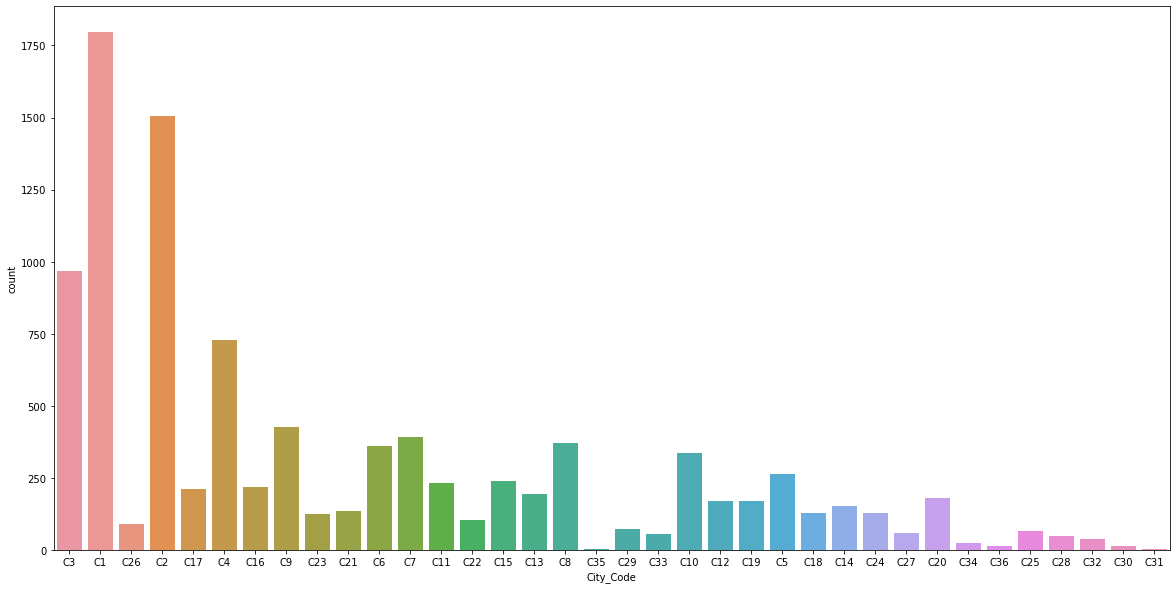

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(df1['City_Code'])
plt.show()

## Observations:
There are 36 city codes in the dataset. There are more datapoints from C1, C2, C3, C4 city codes.

#### Let's see city-wise customers interests in recommended policy

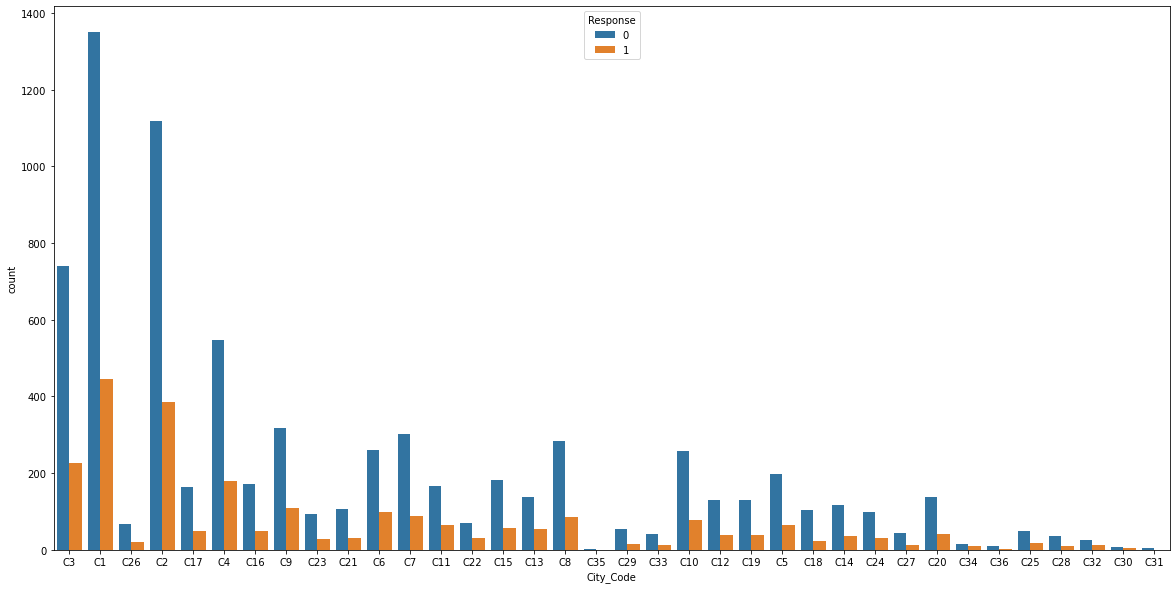

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(df1['City_Code'],hue=df1['Response'])
plt.show()

## Observation:
The response of customers interest in recommended policy.

#### I grouped those values into four groups (C1-C9),(C10-C18),(C19-C27) and (C28-C36)

In [24]:
def city_code(x):
    if x in ['C1','C2','C3','C4','C5','C6','C7','C8','C9']:
        return 'C1-C9'
    elif x in ['C10','C11','C12','C13','C14','C15','C16','C17','C18']:
        return 'C10-C18'
    elif x in ['C19','C20','C21','C22','C23','C24','C25','C26','C27']:
        return 'C19-C27'
    else:
        return 'C28-C36'

In [25]:
df1['City_Code']=df1['City_Code'].apply(lambda x: city_code(x))

In [26]:
df1['City_Code'].value_counts()

C1-C9      6808
C10-C18    1876
C19-C27    1049
C28-C36     267
Name: City_Code, dtype: int64

<AxesSubplot:xlabel='City_Code', ylabel='count'>

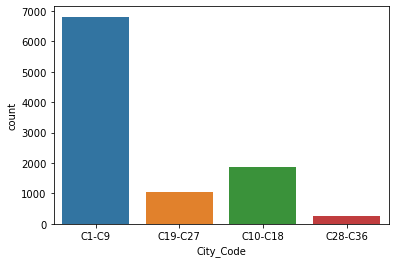

In [27]:
sns.countplot(df1['City_Code'])

<AxesSubplot:xlabel='City_Code', ylabel='count'>

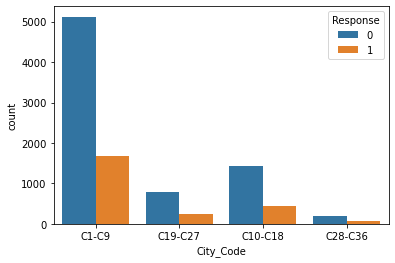

In [28]:
sns.countplot(df1['City_Code'],hue=df1['Response'])

## Observation:
The above plots shows response of customers based on city codes after grouping.

### Region Code
#### Let's see the number of regions and region-wise customer interests in recommended policy.

In [29]:
print('no of Regions in the dataframe :',df1['Region_Code'].nunique())
print()
df1['Region_Code'].value_counts()

no of Regions in the dataframe : 3726



1       23
6       18
4       18
7       17
30      15
        ..
2747     1
733      1
714      1
2764     1
6147     1
Name: Region_Code, Length: 3726, dtype: int64

## Observation:
There are 3726 regioin codes in the dataset.

### Accomodation Type
#### Let's see how many customers are living in their own house or rented houseand see how their interests vary in recommended policy.

In [30]:
df1['Accomodation_Type'].value_counts()

1    5509
0    4491
Name: Accomodation_Type, dtype: int64

<AxesSubplot:xlabel='Accomodation_Type', ylabel='count'>

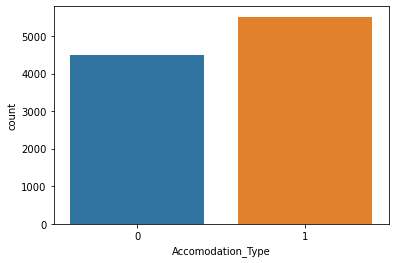

In [31]:
sns.countplot(df1['Accomodation_Type'])

In [32]:
pd.crosstab(df1['Accomodation_Type'],df1['Response'])

Response,0,1
Accomodation_Type,,
0,3423,1068
1,4118,1391


<AxesSubplot:xlabel='Accomodation_Type', ylabel='count'>

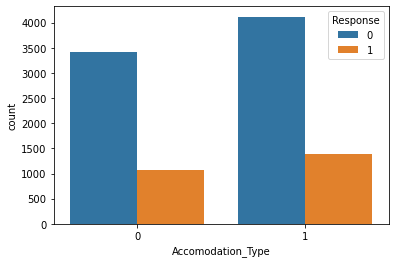

In [33]:
sns.countplot(df1['Accomodation_Type'],hue=df1['Response'])

## Observations:
There are more customers with owned house than rented in the dataset, from the above countplot, we can say that most customers didn't shown interest in the recommended policy.

#### Let's see the city-wise accomodation type and customer response

In [34]:
pd.crosstab(df1['Response'],columns=[df1['City_Code'],df1['Accomodation_Type']])

City_Code         C1-C9       C10-C18      C19-C27      C28-C36    
Accomodation_Type     0     1       0    1       0    1       0   1
Response                                                           
0                  2180  2940     781  645     357  441     105  92
1                   698   990     234  216     106  145      30  40

<AxesSubplot:xlabel='Response'>

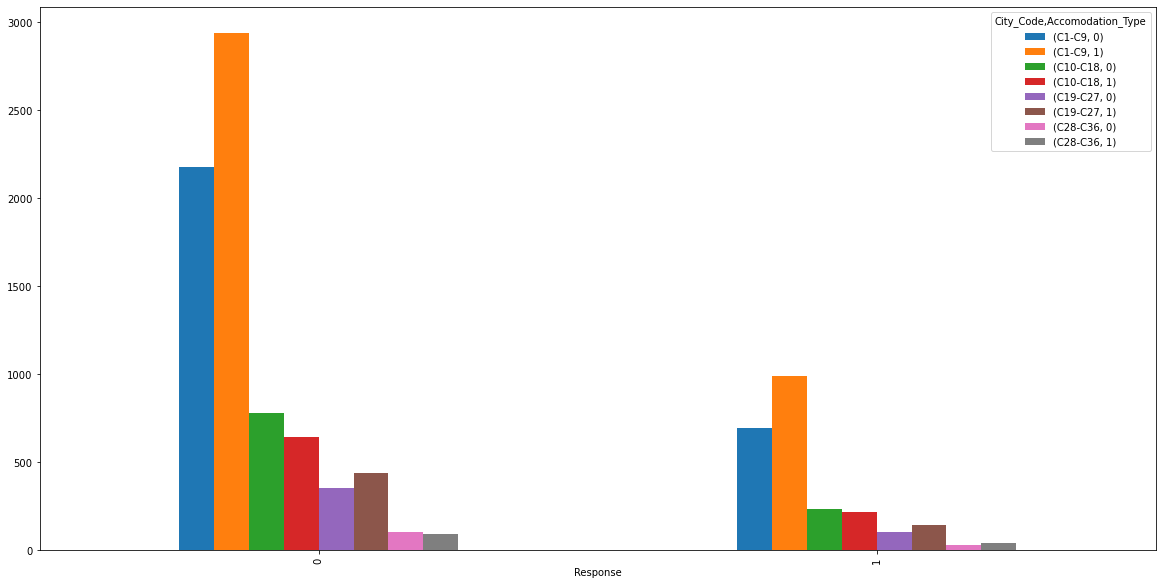

In [35]:
pd.crosstab(df1['Response'],columns=[df1['City_Code'],df1['Accomodation_Type']]).plot(kind='bar',figsize=(20,10))

## Observations:
Their is more costomer in city code c1-c9 having interest and also not interest.

### Reco Insurance Type
#### Let's see the various recommended insurance types and customer response to them.

In [36]:
pd.crosstab(df1['Reco_Insurance_Type'],df1['Response'])

Response,0,1
Reco_Insurance_Type,,
0,1509,535
1,6032,1924


<AxesSubplot:xlabel='Reco_Insurance_Type', ylabel='count'>

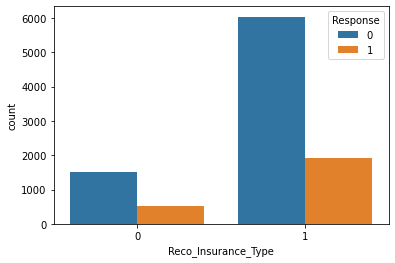

In [37]:
sns.countplot(df1['Reco_Insurance_Type'],hue=df1['Response'])

#### Let's see customers accommodation, recommended insurance type and customer responses.

In [38]:
pd.crosstab(index=[df1['Accomodation_Type'],df1['Reco_Insurance_Type']],columns=df['Response'])

Response                                  0    1
Accomodation_Type Reco_Insurance_Type           
0                 0                     380  139
                  1                    3043  929
1                 0                    1129  396
                  1                    2989  995

<AxesSubplot:xlabel='Accomodation_Type,Reco_Insurance_Type'>

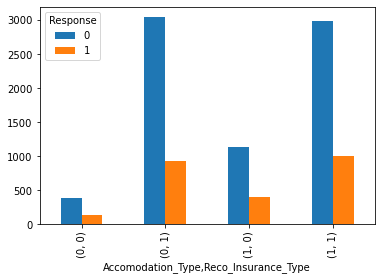

In [39]:
pd.crosstab(index=[df1['Accomodation_Type'],df1['Reco_Insurance_Type']],columns=df1['Response']).plot(kind='bar')

### Recommended Policy Category
#### Let's see how many categories under the type of recommended policies.

In [40]:
print('Number of Recommended Policy Categories : ',df1['Reco_Policy_Cat'].nunique())

Number of Recommended Policy Categories :  22


In [41]:
df1['Reco_Policy_Cat'].unique()

array([16, 19, 17, 21,  9, 18, 13, 15, 14, 22, 20,  5, 12,  6,  4,  1,  3,
       11,  8,  2,  7, 10], dtype=int64)

<AxesSubplot:xlabel='Reco_Policy_Cat', ylabel='count'>

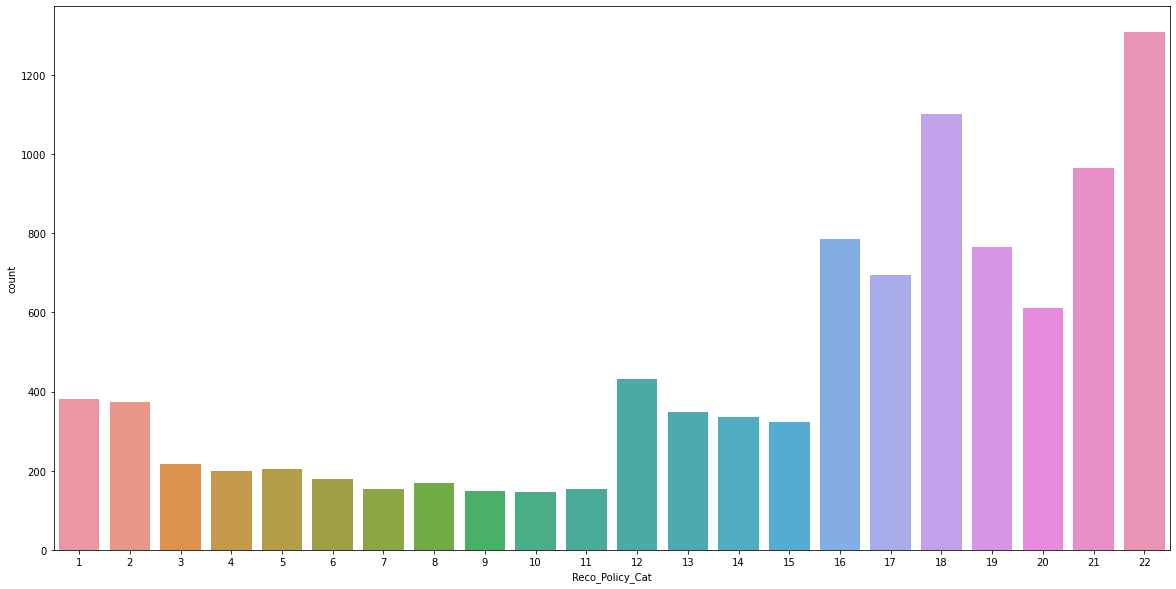

In [42]:
plt.figure(figsize=(20,10))
sns.countplot(df1['Reco_Policy_Cat'])

## Observation:
There are more customers in Reco_Policy_Cat from 16 to 22.

### Recommended Policy Premium
#### Let's see if there is a relationship between the recommended policy premium and recommended policy category.Analyse results with customer's holding policy type and their response to recommended policy.


In [43]:
avg_premium=df1.groupby(df1['Reco_Policy_Cat'])[['Reco_Policy_Premium']].mean()
avg_premium

,Reco_Policy_Premium
Reco_Policy_Cat,
1,12915.944357
2,13231.982306
3,15390.644240
4,12157.566000
5,16142.542157
6,13193.164444
7,15231.881046
8,14319.471765
9,13699.385333


<AxesSubplot:xlabel='Reco_Policy_Cat'>

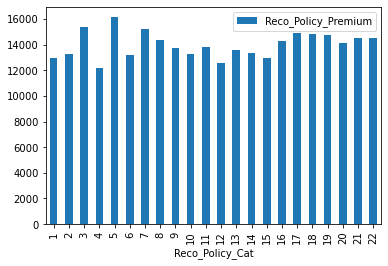

In [44]:
avg_premium.plot(kind='bar')

Text(0, 0.5, 'Average Recommended plocy premium')

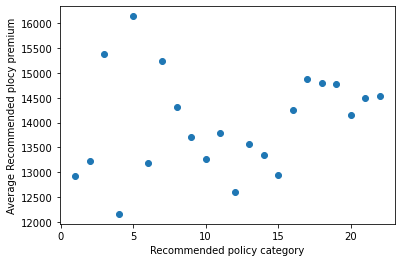

In [45]:
plt.scatter(avg_premium.index,avg_premium.values)
plt.xlabel('Recommended policy category')
plt.ylabel('Average Recommended plocy premium')

<AxesSubplot:xlabel='Reco_Policy_Cat'>

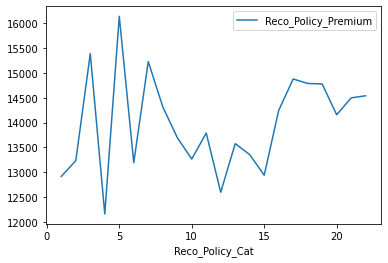

In [46]:
avg_premium.plot(kind='line')

## Observation:
There is relationship between Reco_Policy_Cat and Reco_Policy_Premium.

In [47]:
pd.crosstab(df1['Holding_Policy_Type'],df1['Response'])

Response,0,1
Holding_Policy_Type,,
1.0,1212,390
2.0,730,243
3.0,5037,1590
4.0,562,236


<AxesSubplot:xlabel='Holding_Policy_Type'>

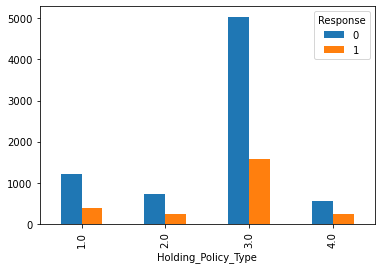

In [48]:
pd.crosstab(df1['Holding_Policy_Type'],df1['Response']).plot(kind='bar')

## Observation:
There are more customers from Holding_Policy_Type 3 thats they didn't showed interest in Recommended Policy.

#### Let's see which type of recommnded policy has more number of customers

In [49]:
df1['Reco_Policy_Cat'].value_counts()

22    1308
18    1102
21     966
16     786
19     764
17     694
20     612
12     431
1      381
2      373
13     348
14     336
15     323
3      217
5      204
4      200
6      180
8      170
11     155
7      153
9      150
10     147
Name: Reco_Policy_Cat, dtype: int64

In [50]:
print('Recommended policy category {} has more number of customers with {}'.format(df1['Reco_Policy_Cat'].value_counts().idxmax(),df1['Reco_Policy_Cat'].value_counts().max()))

Recommended policy category 22 has more number of customers with 1308


In [51]:
pd.crosstab(df1['Reco_Policy_Cat'],df1['Response'])

Response,0,1
Reco_Policy_Cat,,
1,378,3
2,324,49
3,173,44
4,182,18
5,150,54
6,154,26
7,123,30
8,137,33
9,123,27


<AxesSubplot:xlabel='Reco_Policy_Cat'>

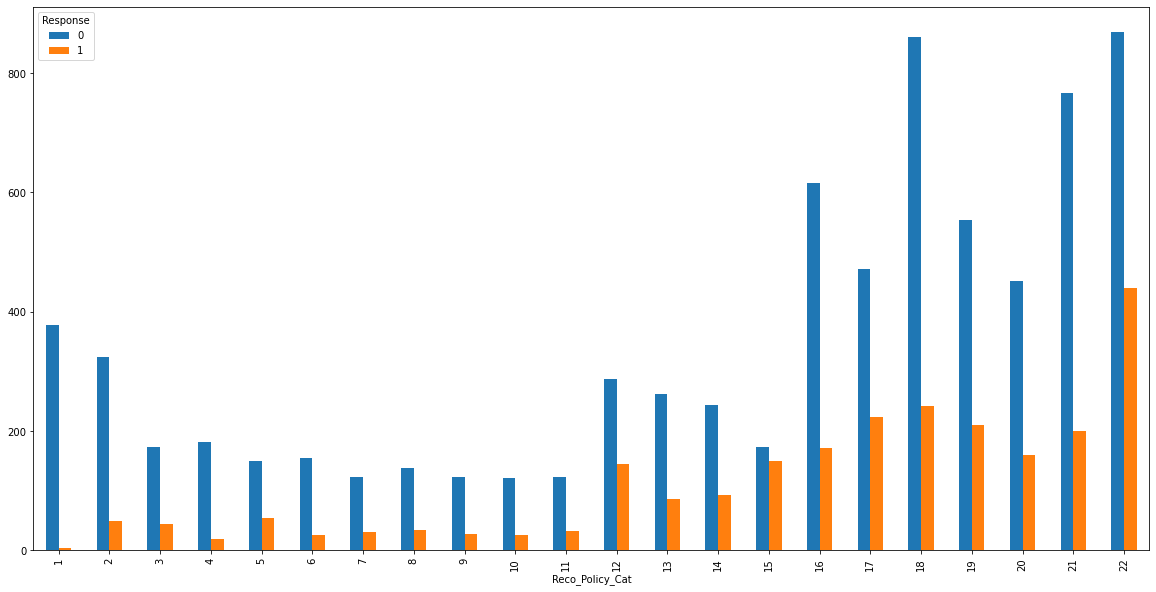

In [52]:
pd.crosstab(df1['Reco_Policy_Cat'],df1['Response']).plot(kind='bar',figsize=(20,10))

## Observations:
Category 1 policy are mostly rejeted by near to all customers.
Category 15 policies are accepted by nearly 50 % of those customers.
Remaining Categories are mostly rejected by al customers than those who accepted policy.

#### Let's see city-wise recommended insurance types to customers and theirresponses to recommended policy.


In [53]:
pd.crosstab(index=[df1['City_Code'],df1['Reco_Insurance_Type']],columns=df1['Response'])

Response                          0     1
City_Code Reco_Insurance_Type            
C1-C9     0                    1056   372
          1                    4064  1316
C10-C18   0                     271    95
          1                    1155   355
C19-C27   0                     141    50
          1                     657   201
C28-C36   0                      41    18
          1                     156    52

<AxesSubplot:xlabel='City_Code,Reco_Insurance_Type'>

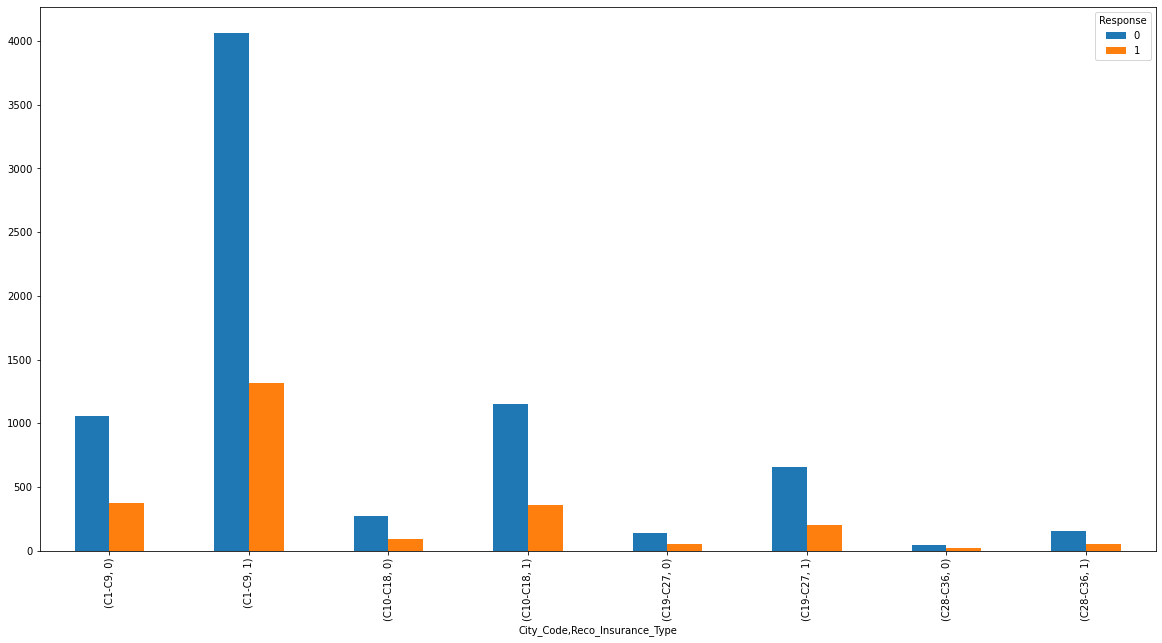

In [54]:
pd.crosstab(columns=df1['Response'],index=[df1['City_Code'],df1['Reco_Insurance_Type']]).plot(kind='bar',figsize=(20,10))

## Observations:
There are more number of customers with individual recommended insurance type in city codes C1 - C9.
The response of the customers based on city codes and recommended insurance types.

#### Let's analyze the customer's upper age with their type of accommodation and recommended policy types to them and also their interest in the recommended policy.


In [55]:
pd.crosstab(df1['Accomodation_Type'],df1['Upper_Age'])

Upper_Age,18,19,20,21,22,23,24,25,26,27,...,66,67,68,69,70,71,72,73,74,75
Accomodation_Type,,,,,,,,,,,,,,,,,,,,,
0,24,101,129,221,240,247,252,240,201,173,...,32,24,26,23,28,16,25,17,15,109
1,5,12,21,31,56,59,64,70,88,79,...,106,109,80,97,106,102,74,85,70,441


<AxesSubplot:xlabel='Upper_Age', ylabel='count'>

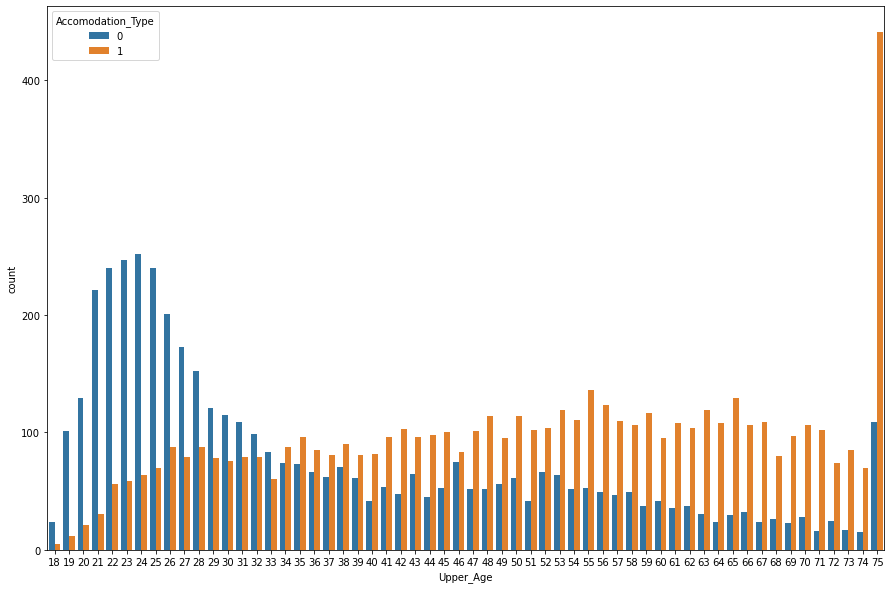

In [56]:
plt.figure(figsize=(15,10))
sns.countplot(df1['Upper_Age'],hue=df1['Accomodation_Type'])

In [57]:
pd.crosstab(df1['Reco_Policy_Cat'],df1['Upper_Age'])

Upper_Age,18,19,20,21,22,23,24,25,26,27,...,66,67,68,69,70,71,72,73,74,75
Reco_Policy_Cat,,,,,,,,,,,,,,,,,,,,,
1,0,2,7,8,10,16,12,9,6,14,...,2,4,1,2,4,2,2,3,2,18
2,8,5,5,9,11,16,11,9,10,6,...,3,1,1,2,6,1,3,1,1,16
3,0,0,4,5,5,9,4,8,2,4,...,1,5,3,5,0,0,4,1,7,14
4,0,2,3,10,12,5,9,10,8,2,...,2,1,2,3,1,1,0,2,1,4
5,0,2,0,1,1,5,6,7,3,8,...,3,4,4,5,5,7,0,5,3,21
6,0,6,5,9,6,6,8,3,4,2,...,0,1,1,1,0,4,0,2,1,8
7,0,2,0,1,6,5,3,3,5,2,...,5,7,2,1,1,2,4,3,6,12
8,0,0,5,3,9,8,4,5,5,3,...,4,2,4,2,3,4,0,0,2,10
9,0,0,3,4,5,5,6,4,4,7,...,2,1,1,2,1,0,2,1,1,4


In [58]:
pd.crosstab(df1['Response'],df1['Upper_Age'])

Upper_Age,18,19,20,21,22,23,24,25,26,27,...,66,67,68,69,70,71,72,73,74,75
Response,,,,,,,,,,,,,,,,,,,,,
0,24,91,116,192,232,240,243,230,217,189,...,96,103,80,82,97,88,81,73,74,413
1,5,22,34,60,64,66,73,80,72,63,...,42,30,26,38,37,30,18,29,11,137


<AxesSubplot:xlabel='Upper_Age', ylabel='count'>

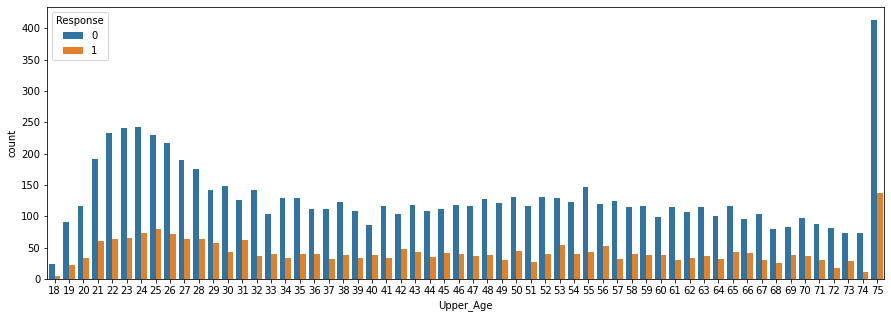

In [59]:
plt.figure(figsize=(15,5))
sns.countplot(df1['Upper_Age'],hue=df1['Response'])

#### Let's see city-wise the customers who have recommended to take the joint policy with their spouse or with other customers. Check these results with the customer's type of accommodation.


In [60]:
df1[df['Reco_Insurance_Type']==0]['City_Code'].value_counts()

C1-C9      1428
C10-C18     366
C19-C27     191
C28-C36      59
Name: City_Code, dtype: int64

In [61]:
pd.crosstab(df1[df1['Reco_Insurance_Type']==0]['Response'],df1[df1['Reco_Insurance_Type']==0]['City_Code'])

City_Code,C1-C9,C10-C18,C19-C27,C28-C36
Response,,,,
0,1056,271,141,41
1,372,95,50,18


<AxesSubplot:xlabel='City_Code'>

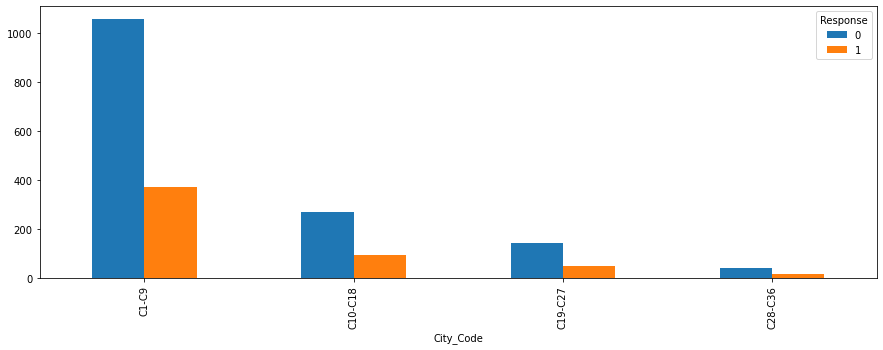

In [62]:
pd.crosstab(df1[df1['Reco_Insurance_Type']==0]['City_Code'],
            df1[df1['Reco_Insurance_Type']==0]['Response']).plot(kind='bar',figsize=(15,5))

In [63]:
df1['Age']=(df1['Upper_Age']+df1['Lower_Age'])/2

In [64]:
def policy_category(x):
    if x>=1 and x<=5:
        return '1-5'
    elif x>5 and x<=11:
        return '6-11'
    elif x>11 and x<=15:
        return '12-15'
    else:
        return '16-22'

In [65]:
df1['Reco_Policy_Cat']=df1['Reco_Policy_Cat'].apply(lambda x: policy_category(x))

In [66]:
Q1,Q3 = np.percentile(df1['Reco_Policy_Premium'],[25,75])
IQR = Q3-Q1
LB = Q1-1.5*IQR
UB = Q3+1.5*IQR
df1['Reco_Policy_Premium']=df1['Reco_Policy_Premium'].apply(lambda x: UB if x>UB else x)

<AxesSubplot:xlabel='Reco_Policy_Premium'>

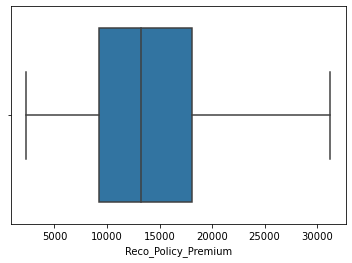

In [67]:
sns.boxplot(df1['Reco_Policy_Premium'])

In [68]:
df1['Holding_Policy_Type']=df1['Holding_Policy_Type'].astype('category')
df1['Reco_Policy_Cat']=df1['Reco_Policy_Cat'].astype('category')

In [69]:
df1=pd.concat([df1,pd.get_dummies(df1[['City_Code','Holding_Policy_Type','Reco_Policy_Cat']],drop_first=True)],axis=1)

In [70]:
df1.drop(['City_Code','Region_Code','Holding_Policy_Type','Reco_Policy_Cat','Upper_Age','Lower_Age'],axis=1,inplace=True)

In [71]:
df1.corr()

,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Holding_Policy_Duration,Reco_Policy_Premium,Response,X1,X2,X3,X4,...,Age,City_Code_C10-C18,City_Code_C19-C27,City_Code_C28-C36,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0,Reco_Policy_Cat_12-15,Reco_Policy_Cat_16-22,Reco_Policy_Cat_6-11
Accomodation_Type,1.000000,-0.198900,0.201228,-0.005755,0.353815,0.016965,-0.034105,0.038888,-0.063311,0.056460,...,0.403172,-0.088828,0.005318,-0.018820,0.004731,-0.027561,0.090054,-0.045948,0.028540,0.011554
Reco_Insurance_Type,-0.198900,1.000000,-0.887177,0.013249,-0.585791,-0.018647,0.040732,-0.035448,0.047049,-0.026421,...,-0.099538,0.011087,0.018949,-0.006807,-0.005120,0.007636,-0.070361,0.009843,-0.012885,0.005233
Is_Spouse,0.201228,-0.887177,1.000000,-0.007911,0.509409,0.007075,-0.046082,0.045141,-0.060402,0.031452,...,0.125299,-0.022971,-0.020452,0.013418,-0.007811,0.004150,0.069827,-0.011331,0.018084,-0.001484
Holding_Policy_Duration,-0.005755,0.013249,-0.007911,1.000000,-0.033647,0.006420,0.001549,0.008583,0.008991,-0.019341,...,-0.036149,-0.033524,-0.013970,0.016888,-0.209263,0.498047,-0.152547,-0.002858,-0.002149,0.021292
Reco_Policy_Premium,0.353815,-0.585791,0.509409,-0.033647,1.000000,0.011012,-0.030865,0.040611,-0.047311,0.020886,...,0.723738,-0.055175,-0.045234,-0.046257,0.021967,-0.084427,0.115712,-0.069436,0.076480,-0.012469
Response,0.016965,-0.018647,0.007075,0.006420,0.011012,1.000000,-0.000446,0.011155,-0.009865,-0.000023,...,0.003930,-0.006727,-0.005266,0.006259,0.002930,-0.019441,0.034083,0.078357,0.053937,-0.048067
X1,-0.034105,0.040732,-0.046082,0.001549,-0.030865,-0.000446,1.000000,-0.493197,-0.385311,-0.342015,...,-0.018958,0.003080,-0.018117,-0.022970,0.032669,-0.011965,-0.012596,0.009752,-0.000909,-0.007354
X2,0.038888,-0.035448,0.045141,0.008583,0.040611,0.011155,-0.493197,1.000000,-0.198743,-0.176411,...,0.028935,-0.016215,0.003460,0.021371,-0.029643,0.025799,-0.021875,-0.032339,0.028818,0.010430
X3,-0.063311,0.047049,-0.060402,0.008991,-0.047311,-0.009865,-0.385311,-0.198743,1.000000,-0.137821,...,-0.029652,0.020927,0.007668,0.003847,0.016055,-0.002275,-0.047877,0.048239,-0.036048,-0.008332
X4,0.056460,-0.026421,0.031452,-0.019341,0.020886,-0.000023,-0.342015,-0.176411,-0.137821,1.000000,...,0.017341,-0.014371,0.001737,-0.008167,-0.022799,0.001125,0.069886,-0.042745,0.024972,-0.004471


<AxesSubplot:>

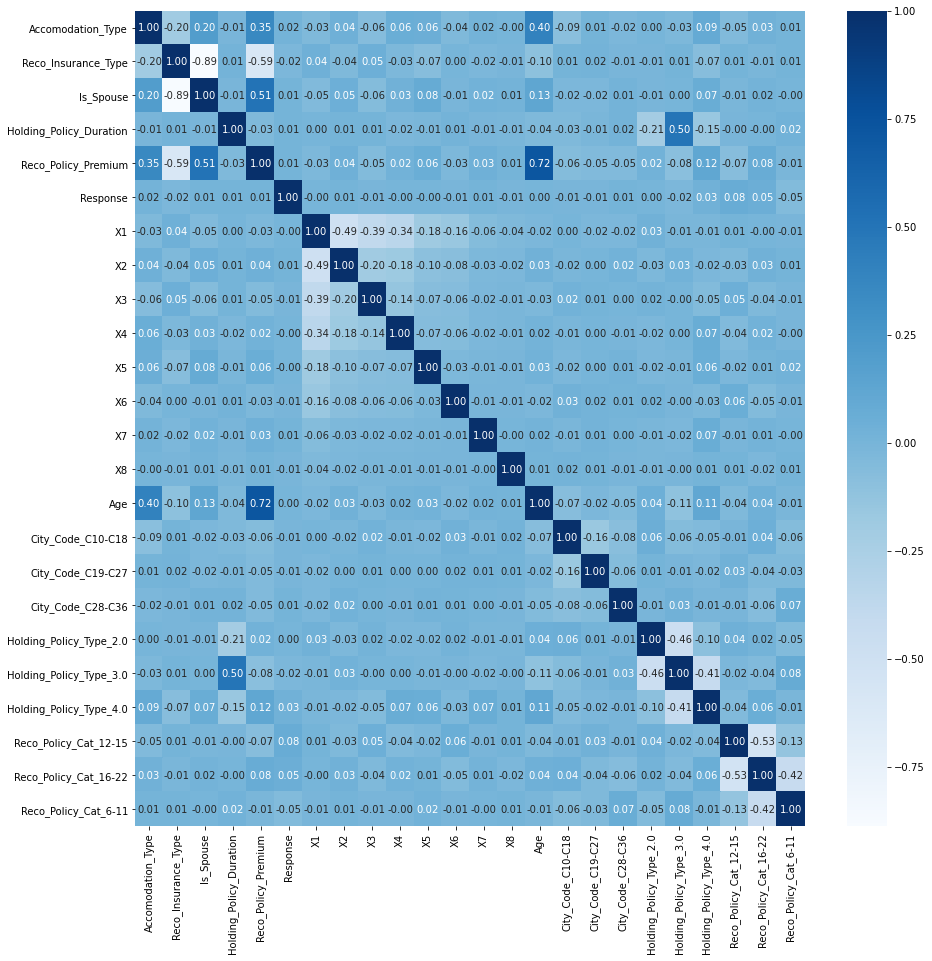

In [72]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),annot=True,cmap='Blues',fmt='.2f')

In [74]:
df1.shape

(10000, 24)

In [75]:
df1.to_csv('Clean.csv')